# Running Neural Networks on Capstone Data
## Neural Networks Building Blocks - Loss Functions, Optimizers, and Activations


- Model Construction
- Model Compiling
- Validating Your Model
- Evaluate Your Model

### Modules and Load Data

In [ ]:
# importing  packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

## importing datetime class
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# Optimizers
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

### Load CSV into a Pandas dataframe
This section is to load the original dataset from a CSV file into a dataframe


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 
%%bash
ln -s drive/My\ Drive/BUAN\ 6590\ -\ Capstone/ Capstone

ln: failed to create symbolic link 'Capstone/BUAN 6590 - Capstone': File exists


In [ ]:
# Import the original data from a excel to Pandas Data frame
datas_file_name = '/content/Capstone/DATA/df_merge2_with_Target.csv'
#datas_file_name = '/content/Capstone/DATA/df_dataSMOTE.csv'


df_working_temp = pd.read_csv(datas_file_name,index_col=0)
# df_working_temp.head(5)


In [ ]:
# Drop unused columns in Actiity
drop_col = ['date','user_id','survey_date']
df_working = df_working_temp.drop(drop_col, axis=1)

In [ ]:
#df_working.info()


In [ ]:
#df_working.describe().T

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_temp = pd.DataFrame(df_working.iloc[:,:-1])
names = X_temp.columns
d = scaler.fit_transform(X_temp)
scaled_df = pd.DataFrame(d, columns=names)
# scaled_df.head()
# scaled_df.describe().T

In [ ]:
# scaled_df.describe().T

In [ ]:
# # Write out the merged Dataframe for use in other workbooks 
# outPath = '/content/Capstone/DATA/df_scaled.csv'
# scaled_df.to_csv(outPath)

In [ ]:
# Split dataset into training set and test set
#from sklearn.model_selection import train_test_split

## Separate the target variable and rest of the variables using .iloc to subset the data.
#X, y = df_working.iloc[:,:-1],df_working.iloc[:,-1]
X, y = scaled_df,df_working.iloc[:,-1]
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

### Model Construction

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM, Embedding
max_features = 10000
input_dim = X.shape[1]

# Model 1
model1 = Sequential()
model1.add(Dense(8, input_dim=input_dim, activation='relu'))
# #### Add the 2nd hidden layer
model1.add(Dense(66, activation='relu'))
model1.add(Dense(4, activation='softmax'))




# # Model 2
# model1 = Sequential()
# model1.add(Dense(8, input_dim=input_dim, activation='relu'))
# # #### Add the 2nd hidden layer
# model1.add(Dense(66, activation='relu'))
# model1.add(Dense(32, activation='relu'))
# # #### Add the 2nd hidden layer
# model1.add(Dense(16, activation='relu'))
# model1.add(Dense(4, activation='softmax'))


# #MODEL3
# model1 = Sequential()
# model1.add(Dense(8, input_dim=input_dim, activation='relu'))
# model1.add(Embedding(max_features, 32))
# model1.add(LSTM(32))
# model1.add(Dense(4, activation='softmax'))

# # MODEL 4 lots more layers
# model1 = Sequential()
# model1.add(Dense(8, input_dim=input_dim, activation='relu'))
# # #### Add the 2nd hidden layer
# model1.add(Dense(198, activation='relu'))
# model1.add(Dense(32, activation='relu'))
# # #### Add the 2nd hidden layer
# model1.add(Dense(16, activation='relu'))
# model1.add(Dense(4, activation='softmax'))



model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 272       
_________________________________________________________________
dense_1 (Dense)              (None, 66)                594       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 268       
Total params: 1,134
Trainable params: 1,134
Non-trainable params: 0
_________________________________________________________________


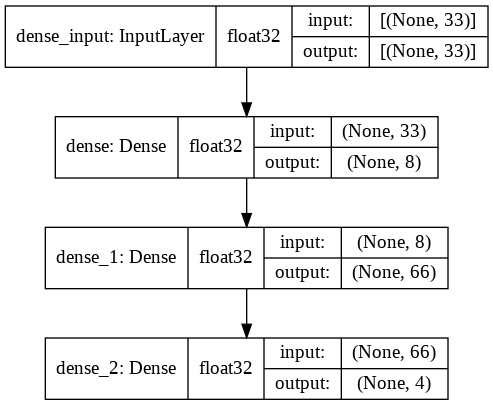

In [ ]:
#### plot the model
plot_model(model1, show_shapes=True, show_dtype=True)


### Functions

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Model Compile#

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from keras.optimizers import SGD
from keras.optimizers import RMSprop

# ADAM OPTIMIZER
opt = Adam(learning_rate=0.001)
#opt = SGD(learning_rate=.001)
#opt = RMSprop(learning_rate=0.001)
model = model1.compile(
    loss='categorical_crossentropy',
    optimizer= opt,
    metrics=['acc',f1_m,precision_m, recall_m]
)



### Model Fit

In [ ]:
# Set Batch size and epochs
BATCH_SIZE = 3
EPOCHS = 500

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
history = model1.fit(
    X,
    dummy_y,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,     
    callbacks=[es]
    )


Epoch 1/500
9896/9896 [==============================] - 19s 2ms/step - loss: 0.9779 - acc: 0.6714 - f1_m: 0.6673 - precision_m: 0.6684 - recall_m: 0.6667 - val_loss: 0.9564 - val_acc: 0.6882 - val_f1_m: 0.6869 - val_precision_m: 0.6877 - val_recall_m: 0.6865
Epoch 2/500
9896/9896 [==============================] - 16s 2ms/step - loss: 0.9684 - acc: 0.6715 - f1_m: 0.6712 - precision_m: 0.6723 - recall_m: 0.6704 - val_loss: 0.9584 - val_acc: 0.6882 - val_f1_m: 0.6823 - val_precision_m: 0.6865 - val_recall_m: 0.6801
Epoch 3/500
9896/9896 [==============================] - 16s 2ms/step - loss: 0.9648 - acc: 0.6716 - f1_m: 0.6706 - precision_m: 0.6720 - recall_m: 0.6697 - val_loss: 0.9558 - val_acc: 0.6882 - val_f1_m: 0.6872 - val_precision_m: 0.6882 - val_recall_m: 0.6865
Epoch 4/500
9896/9896 [==============================] - 17s 2ms/step - loss: 0.9621 - acc: 0.6722 - f1_m: 0.6709 - precision_m: 0.6734 - recall_m: 0.6692 - val_loss: 0.9526 - val_acc: 0.6882 - val_f1_m: 0.6871 - val_pre

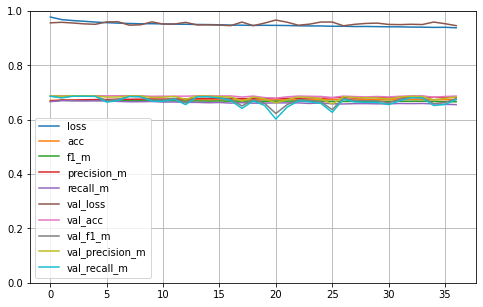

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

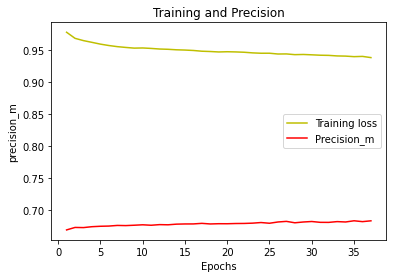

In [ ]:
#### plot the training history again
loss = history.history['loss']
precisionM = history.history['precision_m']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, precisionM, 'r', label='Precision_m')
plt.title('Training and Precision')
plt.xlabel('Epochs')
plt.ylabel('precision_m')
plt.legend()
plt.show()

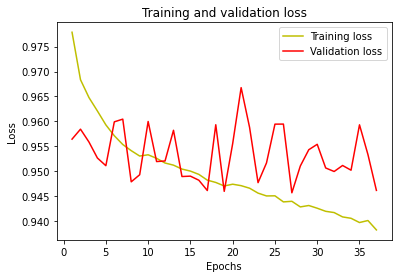

In [ ]:
#### plot the training history again
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model1.evaluate(X,dummy_y,)

1160/1160 [==============================] - 2s 2ms/step - loss: 0.9380 - acc: 0.6768 - f1_m: 0.6710 - precision_m: 0.6792 - recall_m: 0.6646


[0.937978208065033,
 0.6768169403076172,
 0.6709510087966919,
 0.6791504621505737,
 0.6646461486816406]